In [90]:
%matplotlib widget

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [91]:
# Load in csv and replace column integers
card_df = pd.read_csv("main\Resources\cleaned_card_data.csv")
card_df['Used Chip'].replace(1, 'Chip', inplace=True)
card_df['Used Chip'].replace(0, 'No Chip', inplace=True)
card_df['Fraud'].replace(1, 'Fraud', inplace=True)
card_df['Fraud'].replace(0, 'Not Fraud', inplace=True)
card_df['Used Pin Number'].replace(1, 'Pin', inplace=True)
card_df['Used Pin Number'].replace(0, 'No Pin', inplace=True)
card_df.head()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.88,0.31,1.95,1,Chip,No Pin,0,Not Fraud
1,10.83,0.18,1.29,1,No Chip,No Pin,0,Not Fraud
2,5.09,0.81,0.43,1,No Chip,No Pin,1,Not Fraud
3,2.25,5.60,0.36,1,Chip,No Pin,1,Not Fraud
4,44.19,0.57,2.22,1,Chip,No Pin,1,Not Fraud


In [92]:
# Create Used Chip dataframe
used_chip_df = card_df[["Fraud", "Used Chip"]].set_index("Fraud")
used_chip_df.head()

,Used Chip
Fraud,
Not Fraud,Chip
Not Fraud,No Chip
Not Fraud,No Chip
Not Fraud,Chip
Not Fraud,Chip


In [93]:
fraud_chip_df = used_chip_df.loc[(used_chip_df["Used Chip"] == "Chip"), :]
fraud_chip_df.head()

,Used Chip
Fraud,
Not Fraud,Chip
Not Fraud,Chip
Not Fraud,Chip
Not Fraud,Chip
Not Fraud,Chip


In [94]:
grouped_chip_df = fraud_chip_df.groupby(['Fraud', 'Used Chip']).value_counts()
grouped_chip_df.head()

Fraud      Used Chip
Fraud      Chip          22410
Not Fraud  Chip         327989
Name: count, dtype: int64

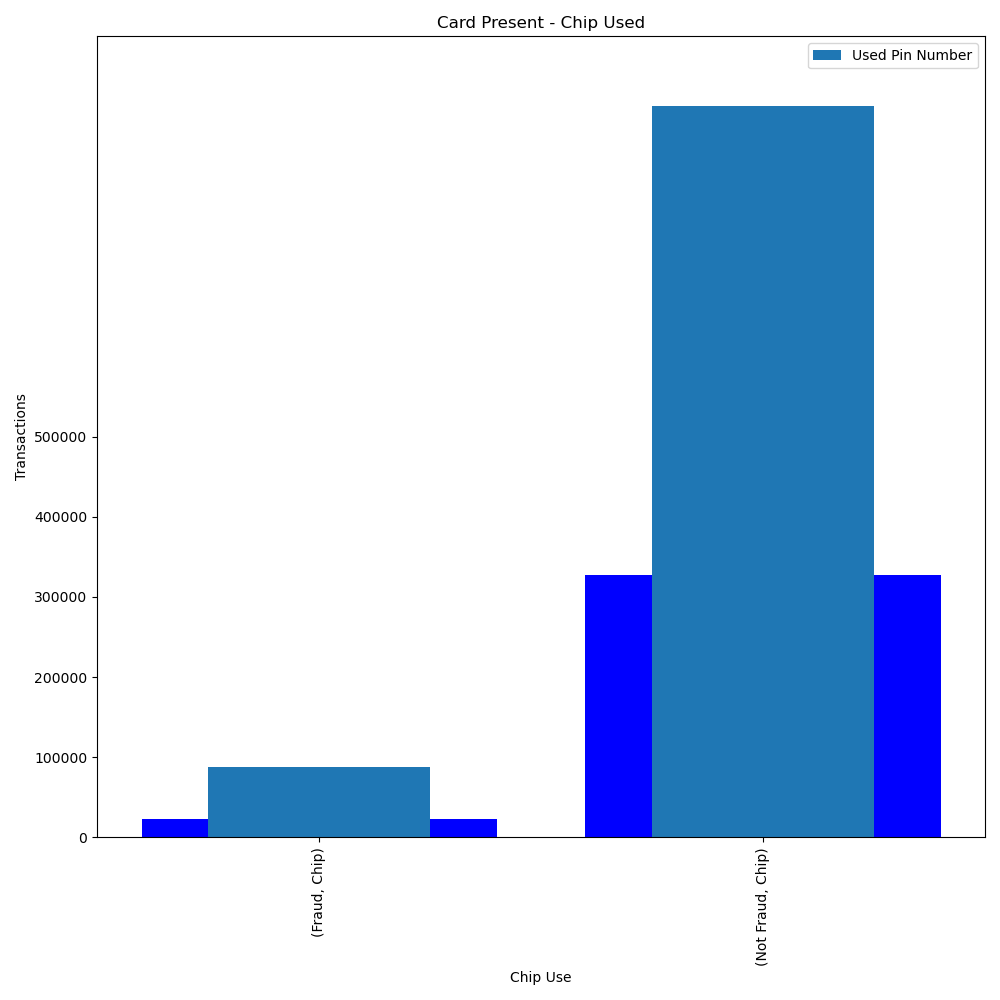

In [97]:
chip_use_plot = grouped_chip_df.plot(kind="bar", figsize=(10,10))
plt.title("Card Present - Chip Used")
plt.ylabel("Transactions")
plt.xlabel("Chip Use", rotation=0)
plt.show()
plt.tight_layout()

In [99]:
# Save an image of the chart and print it to the screen
plt.savefig("../Images/Chip.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Images/Chip.png'

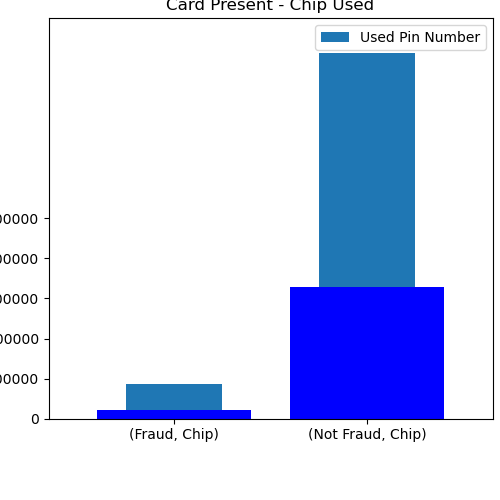

In [100]:
top_chart = grouped_chip_df.plot.bar(y='Fraud', rot=0, width=0.8, figsize=(5,5),ylim=(0,1000000),
                         title='',
                         yticks=[0,100000,200000,300000,400000,500000], xlabel='',color='b')

plt.show()

In [50]:
happiness_dist = grouped_chip_df.plot.hist(column=['Used Chip'],bins=200,xlim=(0,10), width=0.35, figsize=(6,4),
                                         title='Global Happiness Distribution', xticks=range(0,11), 
                                         yticks=[0,10,20], color='cadetblue')

In [15]:
# Create Used Pin Number dataframe
used_pin_df = card_df[["Fraud","Used Pin Number"]]
used_pin_df.head()

,Fraud,Used Pin Number
0,Not Fraud,No Pin
1,Not Fraud,No Pin
2,Not Fraud,No Pin
3,Not Fraud,No Pin
4,Not Fraud,No Pin


In [16]:
fraud_pin_df = used_pin_df.loc[(used_pin_df["Used Pin Number"] == "Pin"), :]
fraud_pin_df.head()

,Fraud,Used Pin Number
7,Not Fraud,Pin
15,Not Fraud,Pin
23,Not Fraud,Pin
37,Not Fraud,Pin
51,Not Fraud,Pin


In [17]:
grouped_pin_df = fraud_pin_df.groupby(['Fraud', 'Used Pin Number']).value_counts()
grouped_pin_df.head()

Fraud      Used Pin Number
Fraud      Pin                   273
Not Fraud  Pin                100335
Name: count, dtype: int64

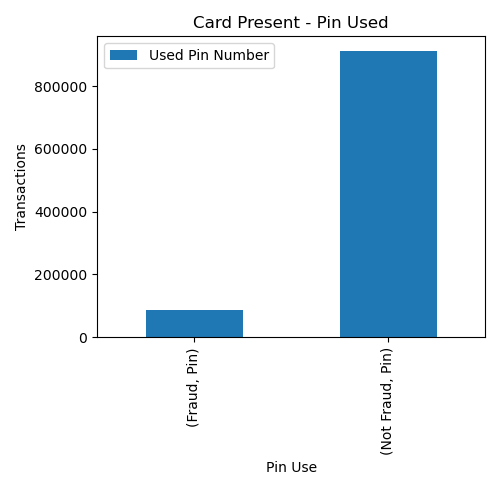

In [18]:
pin_use_plot = grouped_pin_df.plot(kind="bar", figsize=(5,5))
plt.title("Card Present - Pin Used")
plt.ylabel("Transactions")
plt.xlabel("Pin Use", rotation=0)
plt.show()
plt.tight_layout()

In [19]:
joined_data_cols = pd.concat([grouped_chip_df, grouped_pin_df], axis="rows",
                             join="inner", keys=['Used Chip','Used Pin Number'])
joined_data_cols

                 Fraud          
Used Chip        Fraud      Chip     22410
                 Not Fraud  Chip    327989
Used Pin Number  Fraud      Pin        273
                 Not Fraud  Pin     100335
Name: count, dtype: int64

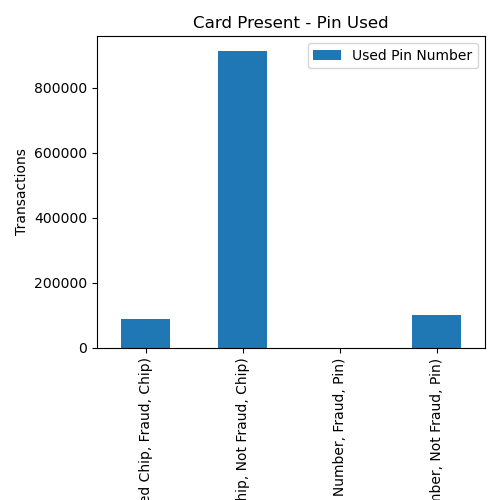

In [20]:
joined_plot = joined_data_cols.plot(kind="bar", figsize=(5,5))
plt.title("Card Present - Pin Used")
plt.ylabel("Transactions")
plt.xlabel("Pin Use", rotation=0)
plt.show()
plt.tight_layout()

In [74]:
chip_used_plot = used_chip_df.plot(kind="bar", figsize=(10,5))
plt.title("Chip Card Present")
plt.ylabel("Transaction Count")
plt.xlabel("Chip Used", rotation=0)
plt.show()
plt.tight_layout()


TypeError: no numeric data to plot

In [ ]:
# Save an image of the chart and print it to the screen
plt.savefig("../Images/CarDensity.png")
plt.show()